## 1. Import necessary libraries

In [60]:
import pandas as pd
import numpy as np
import math
import random as python_random
import matplotlib.pyplot as plt
import io
import os
import glob
import pdb

## Step 1: load the Dataset

In [61]:
df = pd.read_csv("test_predictions_final.csv")
#df.head()

## Step 2: Separate truth labels from predicted labels

In [62]:
truth_labels = [
    "Enlarged Cardiomediastinum_true", "Cardiomegaly_true", "Lung Opacity_true", 
    "Lung Lesion_true", "Edema_true", "Consolidation_true", "Pneumonia_true", 
    "Atelectasis_true", "Pneumothorax_true", "Pleural Effusion_true", 
    "Pleural Other_true", "Fracture_true", "Support Devices_true", "No Finding_true"
]

predicted_labels = [
    "Enlarged Cardiomediastinum_pred", "Cardiomegaly_pred", "Lung Opacity_pred", 
    "Lung Lesion_pred", "Edema_pred", "Consolidation_pred", "Pneumonia_pred", 
    "Atelectasis_pred", "Pneumothorax_pred", "Pleural Effusion_pred", 
    "Pleural Other_pred", "Fracture_pred", "Support Devices_pred", "No Finding_pred"
]

probability_labels = [
    "Enlarged Cardiomediastinum_prob", "Cardiomegaly_prob", "Lung Opacity_prob", 
    "Lung Lesion_prob", "Edema_prob", "Consolidation_prob", "Pneumonia_prob", 
    "Atelectasis_prob", "Pneumothorax_prob", "Pleural Effusion_prob", 
    "Pleural Other_prob", "Fracture_prob", "Support Devices_prob", "No Finding_prob"
]

columns_to_drop_for_true_labels = predicted_labels + probability_labels
columns_to_drop_for_predicted_labels = truth_labels + probability_labels

true_labels_df = df.copy().drop(columns=columns_to_drop_for_true_labels)
pred_labels_df = df.copy().drop(columns=columns_to_drop_for_predicted_labels)

# Remove '_true' and '_pred' suffixes from column names in true_labels_df and pred_labels_df
true_labels_df.columns = true_labels_df.columns.str.replace('_true', '', regex=False)
pred_labels_df.columns = pred_labels_df.columns.str.replace('_pred', '', regex=False)

#remove extra spaces
true_labels_df.columns = true_labels_df.columns.str.strip()
pred_labels_df.columns = pred_labels_df.columns.str.strip()

# Ensure predicted labels match true labels
pred_labels_df.columns = true_labels_df.columns

#predicted_labels_df.head()
#true_labels_df.head()

## Step 3: Calculate TPR

In [63]:

tpr_results = {}


for disease in true_labels_df.columns:
    # cal True Positives (TP) and False Negatives (FN)
    TP = ((true_labels_df[disease] == 1) & (pred_labels_df[disease] == 1)).sum()
    FN = ((true_labels_df[disease] == 1) & (pred_labels_df[disease] == 0)).sum()
    
    # calculate TPR
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # Avoid division by zero
    tpr_results[disease] = TPR

print("True Positive Rates (TPR) for each disease:")
for disease, tpr in tpr_results.items():
    print(f"{disease}: {tpr:.2f}")

True Positive Rates (TPR) for each disease:
study_id: 0.00
dicom_id: 0.00
gender: 0.00
insurance: 0.00
race: 0.00
path: 0.00
age_decile: 0.00
Enlarged Cardiomediastinum: 0.00
Cardiomegaly: 0.23
Lung Opacity: 0.21
Lung Lesion: 0.00
Edema: 0.32
Consolidation: 0.00
Pneumonia: 0.03
Atelectasis: 0.19
Pneumothorax: 0.33
Pleural Effusion: 0.68
Pleural Other: 0.00
Fracture: 0.02
Support Devices: 0.87
No Finding: 0.72


## Calculate TPR Gap for Gender

In [64]:

tpr_results = {}


disease_columns = [
    "Enlarged Cardiomediastinum",
    "Cardiomegaly",
    "Lung Opacity",
    "Lung Lesion",
    "Edema",
    "Consolidation",
    "Pneumonia",
    "Atelectasis",
    "Pneumothorax",
    "Pleural Effusion",
    "Pleural Other",
    "Fracture",
    "Support Devices"
]

for disease in disease_columns:
    # calc TPR for males
    male_true = true_labels_df[true_labels_df["gender"] == "M"]
    male_pred = pred_labels_df[pred_labels_df["gender"] == "M"]
    TP_male = ((male_true[disease] == 1) & (male_pred[disease] == 1)).sum()
    FN_male = ((male_true[disease] == 1) & (male_pred[disease] == 0)).sum()
    TPR_male = TP_male / (TP_male + FN_male) if (TP_male + FN_male) > 0 else 0

    # calc TPR for females
    female_true = true_labels_df[true_labels_df["gender"] == "F"]
    female_pred = pred_labels_df[pred_labels_df["gender"] == "F"]
    TP_female = ((female_true[disease] == 1) & (female_pred[disease] == 1)).sum()
    FN_female = ((female_true[disease] == 1) & (female_pred[disease] == 0)).sum()
    TPR_female = TP_female / (TP_female + FN_female) if (TP_female + FN_female) > 0 else 0

    # calc TPR gap
    tpr_gap = abs(TPR_male - TPR_female)

    # Store TPR values and gap in dict
    tpr_results[disease] = {
        "Male": TPR_male,
        "Female": TPR_female,
        "Gap": tpr_gap
    }

print("TPR for each disease by gender and the TPR gap:")
for disease, values in tpr_results.items():
    print(f"{disease}: Male = {values['Male']:.2f}, Female = {values['Female']:.2f}, Gap = {values['Gap']:.2f}")

TPR for each disease by gender and the TPR gap:
Enlarged Cardiomediastinum: Male = 0.00, Female = 0.00, Gap = 0.00
Cardiomegaly: Male = 0.23, Female = 0.24, Gap = 0.01
Lung Opacity: Male = 0.23, Female = 0.18, Gap = 0.04
Lung Lesion: Male = 0.01, Female = 0.00, Gap = 0.01
Edema: Male = 0.30, Female = 0.34, Gap = 0.04
Consolidation: Male = 0.00, Female = 0.00, Gap = 0.00
Pneumonia: Male = 0.03, Female = 0.03, Gap = 0.00
Atelectasis: Male = 0.22, Female = 0.15, Gap = 0.07
Pneumothorax: Male = 0.34, Female = 0.33, Gap = 0.01
Pleural Effusion: Male = 0.67, Female = 0.68, Gap = 0.01
Pleural Other: Male = 0.00, Female = 0.00, Gap = 0.00
Fracture: Male = 0.02, Female = 0.03, Gap = 0.01
Support Devices: Male = 0.89, Female = 0.85, Gap = 0.04


## Calculate TPR Gap for Insurance

In [65]:
tpr_results = {}


disease_columns = [
    "Enlarged Cardiomediastinum",
    "Cardiomegaly",
    "Lung Opacity",
    "Lung Lesion",
    "Edema",
    "Consolidation",
    "Pneumonia",
    "Atelectasis",
    "Pneumothorax",
    "Pleural Effusion",
    "Pleural Other",
    "Fracture",
    "Support Devices"
]


insurance_types = ["Other", "Medicare", "Medicaid"]


for disease in disease_columns:

    tpr_by_insurance = {}

    # calc TPR for each insurance type
    for insurance in insurance_types:
        # Filter the true and predicted labels for the current insurance type
        insurance_true = true_labels_df[true_labels_df["insurance"] == insurance]
        insurance_pred = pred_labels_df[pred_labels_df["insurance"] == insurance]

        # calc True Positives (TP) and False Negatives (FN)
        TP = ((insurance_true[disease] == 1) & (insurance_pred[disease] == 1)).sum()
        FN = ((insurance_true[disease] == 1) & (insurance_pred[disease] == 0)).sum()

        # calc TPR
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0

        # store the TPR for the current insurance type
        tpr_by_insurance[insurance] = TPR

    # calc the TPR gap (difference between the highest and lowest TPR across insurance types)
    tpr_gap = max(tpr_by_insurance.values()) - min(tpr_by_insurance.values())

    # Store TPR values and gap in dict
    tpr_results[disease] = {
        "TPR by Insurance": tpr_by_insurance,
        "Gap": tpr_gap
    }

# Output the TPR results
print("TPR for each disease by insurance type and the TPR gap:")
for disease, values in tpr_results.items():
    print(f"{disease}:")
    for insurance, tpr in values["TPR by Insurance"].items():
        print(f"  {insurance}: {tpr:.2f}")
    print(f"  TPR Gap: {values['Gap']:.2f}")

TPR for each disease by insurance type and the TPR gap:
Enlarged Cardiomediastinum:
  Other: 0.00
  Medicare: 0.00
  Medicaid: 0.00
  TPR Gap: 0.00
Cardiomegaly:
  Other: 0.22
  Medicare: 0.24
  Medicaid: 0.24
  TPR Gap: 0.02
Lung Opacity:
  Other: 0.21
  Medicare: 0.20
  Medicaid: 0.27
  TPR Gap: 0.07
Lung Lesion:
  Other: 0.00
  Medicare: 0.01
  Medicaid: 0.00
  TPR Gap: 0.01
Edema:
  Other: 0.29
  Medicare: 0.34
  Medicaid: 0.28
  TPR Gap: 0.06
Consolidation:
  Other: 0.00
  Medicare: 0.00
  Medicaid: 0.00
  TPR Gap: 0.00
Pneumonia:
  Other: 0.05
  Medicare: 0.02
  Medicaid: 0.02
  TPR Gap: 0.03
Atelectasis:
  Other: 0.21
  Medicare: 0.17
  Medicaid: 0.20
  TPR Gap: 0.03
Pneumothorax:
  Other: 0.40
  Medicare: 0.21
  Medicaid: 0.33
  TPR Gap: 0.19
Pleural Effusion:
  Other: 0.68
  Medicare: 0.68
  Medicaid: 0.62
  TPR Gap: 0.06
Pleural Other:
  Other: 0.00
  Medicare: 0.00
  Medicaid: 0.00
  TPR Gap: 0.00
Fracture:
  Other: 0.03
  Medicare: 0.01
  Medicaid: 0.00
  TPR Gap: 0.03
Supp

## Plot TPR Gap for Insurance

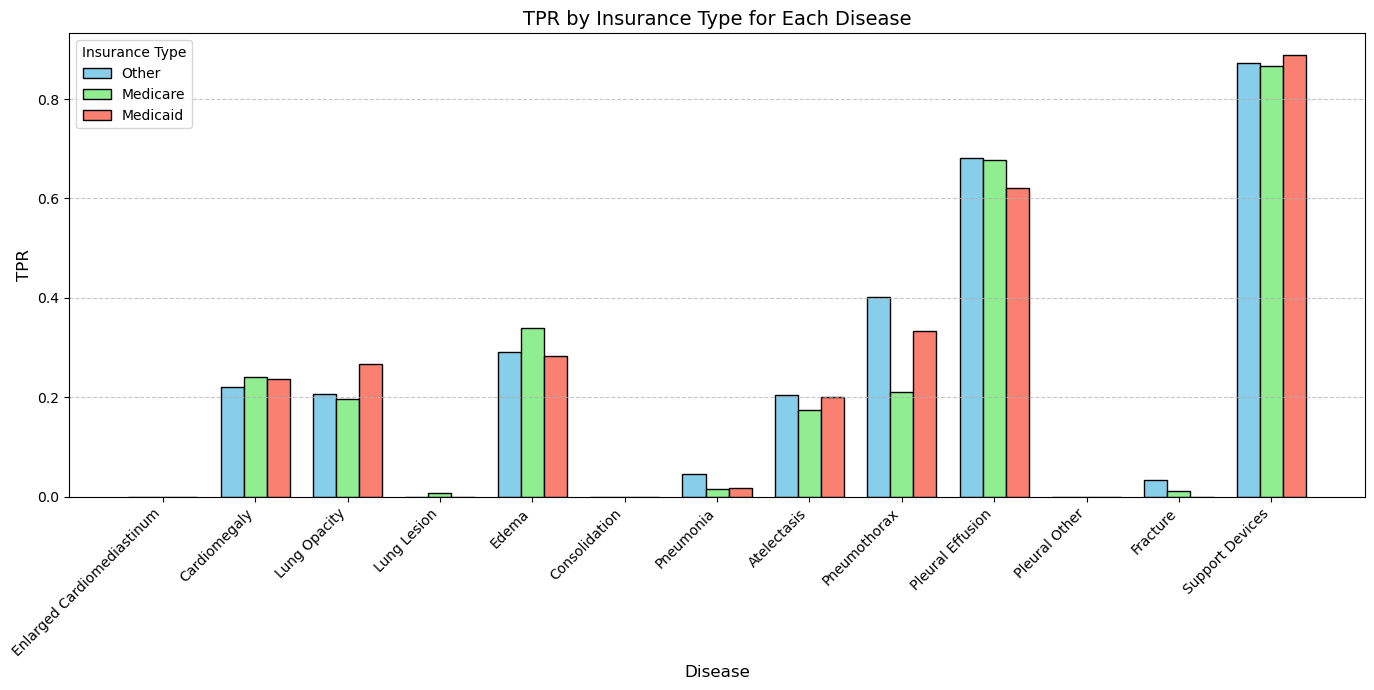

In [69]:
# Extract the TPR values for each insurance type
diseases = list(tpr_results.keys())
insurance_types = ["Other", "Medicare", "Medicaid"]

# Create a DataFrame to store TPR values for plotting
tpr_data = {insurance: [tpr_results[disease]["TPR by Insurance"][insurance] for disease in diseases] for insurance in insurance_types}
tpr_df = pd.DataFrame(tpr_data, index=diseases)

# Plot grouped bar chart
x = np.arange(len(diseases))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

# Create bars for each insurance type
bars_other = ax.bar(x - width, tpr_df["Other"], width, label="Other", color="skyblue", edgecolor="black")
bars_medicare = ax.bar(x, tpr_df["Medicare"], width, label="Medicare", color="lightgreen", edgecolor="black")
bars_medicaid = ax.bar(x + width, tpr_df["Medicaid"], width, label="Medicaid", color="salmon", edgecolor="black")

# Add labels, title, and legend
ax.set_xlabel("Disease", fontsize=12)
ax.set_ylabel("TPR", fontsize=12)
ax.set_title("TPR by Insurance Type for Each Disease", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(diseases, rotation=45, ha="right", fontsize=10)
ax.legend(title="Insurance Type", fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Analysis 

### Gender:
### For most of diseases (e.g., Enlarged Cardiomediastinum, Consolidation, Pneumonia, Pleural Other), the TPR gap is 0.00 or very small (e.g., 0.01). Meaning the model performs equally well for males and females for these diseases. Does not seem like there is bias 

### Atelectasis has the largest TPR gap (0.07), with the model performing better for males (TPR = 0.22) than females (TPR = 0.15).This means the model is less effective at detecting this condition in females

### Insurance:

### Theres a big gap in Pneumothorax detection: With a TPR gap of 0.19 , the largest among all conditions, patients with "Other" insurance have almost twice the detection rate (0.40) compared to Medicare patients (0.21), while Medicaid patients fell in between (0.33). 


### The results show consistent performance for Support Devices: Unlike other conditions, Support Devices showed the most uniform detection rates across all insurance categories 
